# shAI Training 2022 | Level 1


## Task#8 (MNIST Project)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


## Get tha dataset

In [76]:
import sklearn.datasets

In [1]:
# CODE HERE 
# IF you got stuck use GOOGLE 

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)


### exploring and preparing the dataset

#### print your dataset to get insight

In [2]:
# CODE HERE
print(mnist)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', '

#### Split you data into data and labels (target)

In [3]:
# CODE HERE
data=mnist.data
lables=mnist.target

#### find the data shape using .shape function

In [4]:
# CODE HERE
data.shape

(70000, 784)

### Peek at one digit from the dataset

In [5]:
import matplotlib
import matplotlib.pyplot as plt

***NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.***

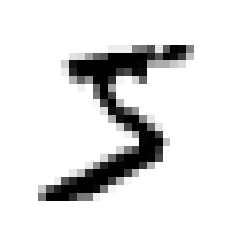

In [6]:
# CODE HERE 
def plot_digit(image_data):
 image = image_data.reshape(28, 28)
 plt.imshow(image, cmap="binary")
 plt.axis("off")
some_digit = data[0]
plot_digit(some_digit)
plt.show()

#### Split the data into train and test set

In [7]:
import numpy as np 

In [8]:
# CODE HERE 
X_train, X_test, y_train, y_test = data[:60000], data[60000:],lables[:60000], lables[60000:]

### Shuffling the training set

In [75]:
#hint shuffle-vs-permutation-numpy
# CODE HERE
import numpy as np
# from np.random import permutation
# error , I don't know

#### access the label of the above digit image 

In [10]:
# CODE HERE
lables[0]

'5'

### Training a <font color= red>Binary</font> classifier 


#### Create the target vectors for this classification task
***NOTE : you can try different number.***

In [11]:
# CODE HERE
# If you got stuck use GOOGLE
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')



### SGD classifier

#### Create a SGD classifier 

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
# CODE HERE
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

#### use SGD classifier  to detect images of the number 5 

In [14]:
# CODE HERE
sgd_clf.predict([some_digit])

array([ True])

## Performance measure 

####  Measuring Accuracy Using <font color= blue>Cross-validation</font>

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
# CODE HERE
cross_val_score(sgd_clf, X_train, y_train_5, cv=3,scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

#### Try a dumb classifier

In [17]:
# CODE HERE
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)



DummyClassifier()

#### find cross_val_score for the dumb classifier

In [18]:
#CODE HERE
cross_val_score(dummy_clf, X_train, y_train_5, cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

## Confusion matrix

In [19]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#### try to find confusion matrix 

In [20]:
# CODE HERE
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5,
cv=3)

In [21]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

####  try perfect classifier which will have only true positives and true negative


In [22]:
# CODE HERE
y_train_perfect_predictions = y_train_5 
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## Precision and Recall

In [23]:
from sklearn.metrics import precision_score, recall_score,f1_score

***Note that precision and recall score might be different from one to anothor***

#### find precision score

In [24]:
# CODE HERE
precision_score(y_train_5, y_train_pred)

0.8370879772350012

#### find recall score

In [25]:
# CODE HERE
recall_score(y_train_5, y_train_pred)

0.6511713705958311

#### find f1 score 
***Notice that f1 score is harmonic mean between recall and precision***

In [26]:
# CODE HERE
f1_score(y_train_5, y_train_pred)

0.7325171197343846

# Precision/Recall Tradeof

#### try to use decision_function() and make prediction

In [27]:
# CODE HERE 
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

#### Set the threshold to zero

In [28]:
# CODE HERE
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

#### Set the threshold to 200000

In [29]:
# CODE HERE
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

#### To decide which threshold you want to use find decision scores for all instances

In [30]:
# CODE HERE
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

#### computing precision and recall for all possible thresholds using the precision_recall_curve() 

In [31]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
thresholds

array([-106527.45300471, -105763.22240074, -105406.2965229 , ...,
         38871.26391927,   42216.05562787,   49441.43765905])

#### plot precision and recall as functions of the threshold value using Matplotlib

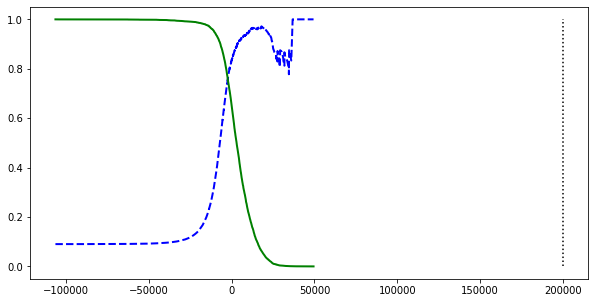

In [32]:
# CODE HERE
plt.figure(figsize=(10,5)) 
plt.plot(thresholds, precisions[:-1], "b--", label="Precision",
linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall",
linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()



#### lets aim for 90%recall 
#### try different threshold and see what will happen

#### precision score

In [33]:
# CODE HERE
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_score(y_train_5, y_train_pred_90)
# 0.32735085945399395

0.9000345901072293

#### recall score

In [34]:
#CODE HERE
recall_score(y_train_5,y_train_pred_90)
# 0.955543257701531

0.4799852425751706

# The ROC Curve

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

#### plot the FPR against the TPR using Matplotlib

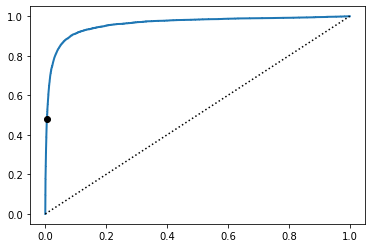

In [37]:
# CODE HERE
idx_for_threshold_at_90 = (thresholds <=threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90],fpr[idx_for_threshold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROCcurve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90%precision")
plt.show()

#### computing the ROC AUC score

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

# RandomForest Classifier
#### train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
# CODE HERE
forest_clf=RandomForestClassifier(random_state=42)

#### try to plot ROC 
***Notice that you will need scores not probabilities***

In [59]:
y_scores_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
                                    # , method="predict_proba")


In [60]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train_5, y_scores_forest)

In [57]:
# false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train_5, y_scores_forest)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_train_5, y_scores)

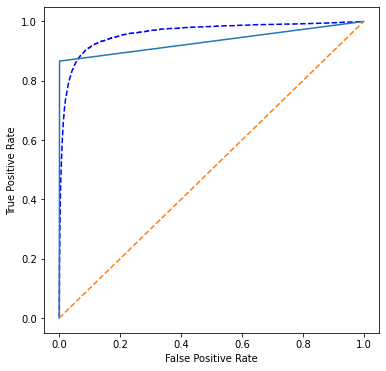

In [73]:
from matplotlib.colorbar import colors
plt.subplots(1, figsize=(6,6))
plt.plot(false_positive_rate2, true_positive_rate2,ls="--",color="blue",label="SGD")
plt.plot(false_positive_rate1, true_positive_rate1,label="RandomForest")
plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### find ROC AUC score for randomforestclassifier

In [74]:
# CODE HERE 
roc_auc_score(y_train_5, y_scores_forest)
0.9984712735923079

0.9984712735923079


# Congrats you did it 🥳 !
# #shAI_Club